# Drawing conclusions from analytics values

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_packages = pd.read_csv("packages.csv")
df_packages = df_packages.rename(columns=
                                 {"name":"package name","desc": "package description", "last_30_d": "installs last 30 days",
                                  "last_90_d":"installs last 90 days","last_year":"installs last year"})
df_packages = df_packages.drop("build_error",axis=1)
len_col = len(df_packages["installs last year"])

In [85]:
df_packages.head(3)

,package name,package description,installs last 30 days,installs last 90 days,installs last year
0,a2ps,Any-to-PostScript filter,106,263,1013
1,a52dec,Library for decoding ATSC A/52 streams (AKA 'A...,100,242,732
2,aacgain,AAC-supporting version of mp3gain,60,150,602


## Sorting values by installs in last 90 days


In [86]:
df_packages_90d = df_packages.sort_values(by="installs last 90 days",ascending=False)
df_packages_90d["position_90d"] = np.arange(len_col)
df_packages_90d.head(3)

,package name,package description,installs last 30 days,installs last 90 days,installs last year,position_90d
4069,python@3.9,"Interpreted, interactive, object-oriented prog...",734572,2419581,3129188,0
3655,openssl@1.1,Cryptography and SSL/TLS Toolkit,688868,2244016,8238647,1
4177,readline,Library for command-line editing,605013,1804149,6047926,2


## Sorting values by installs last 30 days to see the package's change in position - Which packages are becoming more popular compared to 90 days before? And less popular?


In [87]:
df_packages_30d = df_packages_90d.sort_values(by="installs last 30 days",ascending=False)
df_packages_30d["position_30d"] = np.arange(len_col)
df_packages_30d["change of position"] = df_packages_30d["position_90d"]-df_packages_30d["position_30d"]

## Sorting values by installs in last year


In [88]:
df_packages_year = df_packages.sort_values(by="installs last year",ascending=False)
df_packages_year["position_last_year"] = np.arange(len_col)
df_packages_year.head(3)

,package name,package description,installs last 30 days,installs last 90 days,installs last year,position_last_year
3655,openssl@1.1,Cryptography and SSL/TLS Toolkit,688868,2244016,8238647,0
4177,readline,Library for command-line editing,605013,1804149,6047926,1
4617,sqlite,Command-line interface for SQLite,477451,1533054,5725333,2


## Sorting values by installs last 30 days to see the package's change of position - Which packages are becoming more popular compared to a year before? And less popular?


In [89]:
df_packages_30d_last = df_packages_year.sort_values(by="installs last 30 days",ascending=False)
df_packages_30d_last["position_30d"] = np.arange(len_col)
df_packages_30d_last["change of position"] = df_packages_30d_last["position_last_year"]-df_packages_30d_last["position_30d"]
df_packages_30d_last

,package name,package description,installs last 30 days,installs last 90 days,installs last year,position_last_year,position_30d,change of position
4069,python@3.9,"Interpreted, interactive, object-oriented prog...",734572,2419581,3129188,10,0,10
3655,openssl@1.1,Cryptography and SSL/TLS Toolkit,688868,2244016,8238647,0,1,-1
4781,tcl-tk,Tool Command Language,638433,792986,877834,87,2,85
4177,readline,Library for command-line editing,605013,1804149,6047926,1,3,-2
4617,sqlite,Command-line interface for SQLite,477451,1533054,5725333,2,4,-2
...,...,...,...,...,...,...,...,...
3885,pk,Field extractor command-line utility,0,3,28,5115,5472,-357
3080,makeicns,Create icns files from the command-line,0,39,329,3305,5473,-2168
2397,kobalt,Build system,0,6,43,4900,5474,-574
4832,terraform-provisioner-ansible,Ansible provisioner for Terraform,0,0,174,3873,5475,-1602


## major changes of position - first 10 installed packages - Last year to last 30 days

In [90]:
df_major_changes_30d_last = df_packages_30d_last.head(10).sort_values(by="change of position",ascending=False)
df_major_changes_30d_last.head(5)

,package name,package description,installs last 30 days,installs last 90 days,installs last year,position_last_year,position_30d,change of position
4781,tcl-tk,Tool Command Language,638433,792986,877834,87,2,85
4069,python@3.9,"Interpreted, interactive, object-oriented prog...",734572,2419581,3129188,10,0,10
2614,libffi,Portable Foreign Function Interface library,404198,862198,2793010,11,5,6
1706,glib,Core application library for C,375067,1061549,4183253,7,6,1
1540,gdbm,GNU database manager,319317,970874,3719001,9,8,1


## major changes of position - first 10 installed packages - Last 90 days to last 30 days

In [91]:
df_great_changes_30d_90 = df_packages_30d.head(10).sort_values(by="change of position",ascending=False)
df_great_changes_30d_90.head(5)

,package name,package description,installs last 30 days,installs last 90 days,installs last year,position_90d,position_30d,change of position
4781,tcl-tk,Tool Command Language,638433,792986,877834,15,2,13
2614,libffi,Portable Foreign Function Interface library,404198,862198,2793010,11,5,6
4069,python@3.9,"Interpreted, interactive, object-oriented prog...",734572,2419581,3129188,0,0,0
3655,openssl@1.1,Cryptography and SSL/TLS Toolkit,688868,2244016,8238647,1,1,0
4177,readline,Library for command-line editing,605013,1804149,6047926,2,3,-1


## major changes of position - all installed packages - Last year to last 30 days

In [92]:
df_great_changes_30d_last_all = df_packages_30d_last.sort_values(by="change of position",ascending=False)
df_great_changes_30d_last_all

,package name,package description,installs last 30 days,installs last 90 days,installs last year,position_last_year,position_30d,change of position
2396,ko,Build and deploy Go applications on Kubernetes,92,92,92,4409,2390,2019
5161,vsh,HashiCorp Vault interactive shell,88,88,88,4433,2422,2011
3337,msc-generator,Draws signalling charts from textual description,60,60,60,4692,2705,1987
889,curlie,"Power of curl, ease of use of httpie",79,79,79,4490,2503,1987
754,coin3d,Open Inventor 2.1 API implementation (Coin) wi...,79,79,79,4492,2505,1987
...,...,...,...,...,...,...,...,...
1422,fondu,Tools to convert between different font formats,0,29,515,2893,5406,-2513
425,boost@1.60,Collection of portable C++ source libraries,10,49,3036,1646,4196,-2550
1246,erlang@20,Programming language for highly scalable real-...,5,34,4235,1450,4697,-3247
3729,pandoc-citeproc,Library and executable for using citeproc with...,11,421,18694,760,4165,-3405


## Creating dictionary with number of installs  


In [93]:
values_dict = {
      "number of installs last year" :
      df_packages["installs last year"].sum(),
      "number of installs last 90 days" : 
      df_packages["installs last 90 days"].sum(),
      "number of installs last 30 days" :
      df_packages["installs last 30 days"].sum(),
      "first 10 - percent - last year" :
      (df_packages_30d["installs last year"].head(10).sum()
      /df_packages_30d["installs last year"].sum())*100,
      "first one - percent - last year" :
      (df_packages_30d["installs last year"].head(1).sum()
      /df_packages_30d["installs last year"].sum())*100
    } 
values_dict

{'number of installs last year': 274731178,
 'number of installs last 90 days': 79238914,
 'number of installs last 30 days': 27365368,
 'first 10 - percent - last year': 15.824464961162871,
 'first one - percent - last year': 1.1389999572600384}

## Percent columns - percent of installs (30 days 90 days) in the year

In [94]:
df_packages_30d["percent of installs last 30 days"] = (df_packages_30d["installs last 30 days"]/
                                                  df_packages_30d["installs last year"])*100
df_packages_30d["percent of installs last 90 days"] = (df_packages_30d["installs last 90 days"]/
                                                  df_packages_30d["installs last year"])*100                                                  
df_packages_30d.head(5).sort_values(by="percent of installs last 30 days",ascending=False)                                        

,package name,package description,installs last 30 days,installs last 90 days,installs last year,position_90d,position_30d,change of position,percent of installs last 30 days,percent of installs last 90 days
4781,tcl-tk,Tool Command Language,638433,792986,877834,15,2,13,72.728215,90.334391
4069,python@3.9,"Interpreted, interactive, object-oriented prog...",734572,2419581,3129188,0,0,0,23.474844,77.322967
4177,readline,Library for command-line editing,605013,1804149,6047926,2,3,-1,10.003644,29.830871
3655,openssl@1.1,Cryptography and SSL/TLS Toolkit,688868,2244016,8238647,1,1,0,8.361421,27.237676
4617,sqlite,Command-line interface for SQLite,477451,1533054,5725333,3,4,-1,8.339270,26.776678


## Visualizing the data

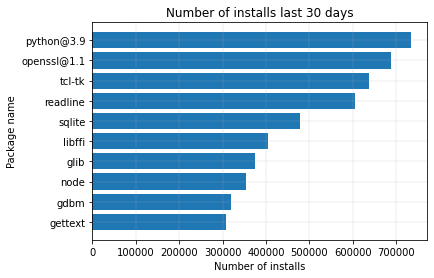

In [95]:
df_packages_30d = df_packages_30d.head(10).sort_values(by="installs last 30 days",ascending=True)
plt.barh(df_packages_30d["package name"],df_packages_30d["installs last 30 days"])
plt.title("Number of installs last 30 days")
plt.xlabel('Number of installs')
plt.ylabel('Package name')
plt.grid(lw=0.2)
plt.show()

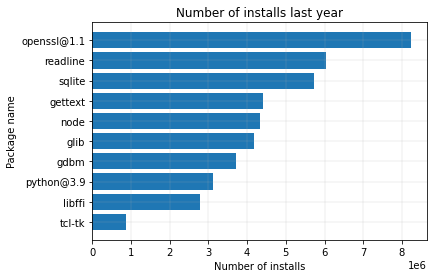

In [96]:
df_packages_30d = df_packages_30d.head(10).sort_values(by="installs last year",ascending=True)
plt.barh(df_packages_30d["package name"],df_packages_30d["installs last year"])
plt.title("Number of installs last year")
plt.xlabel('Number of installs')
plt.ylabel('Package name')
plt.grid(lw=0.2)
plt.show()

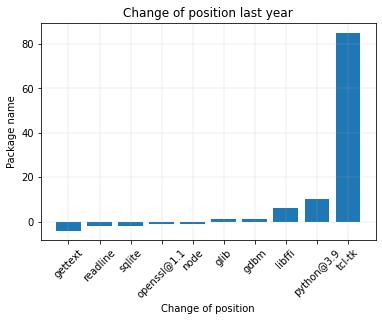

In [97]:
df_major_changes_30d_last = df_packages_30d_last.head(10).sort_values(by="change of position",ascending=True)
plt.bar(df_major_changes_30d_last["package name"],df_major_changes_30d_last["change of position"])
plt.title("Change of position last year")
plt.xlabel('Change of position')
plt.xticks(rotation=45)
plt.ylabel('Package name')
plt.grid(lw=0.2)
plt.show()

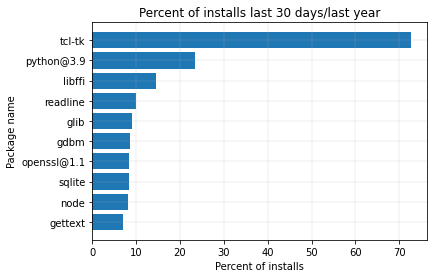

In [98]:
df_packages_30d = df_packages_30d.head(10).sort_values(by="percent of installs last 30 days",ascending=True)
plt.barh(df_packages_30d["package name"],df_packages_30d["percent of installs last 30 days"])
plt.title("Percent of installs last 30 days/last year")
plt.xlabel('Percent of installs')
plt.ylabel('Package name')
plt.grid(lw=0.2)
plt.show()